In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import random
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
training = pd.read_csv("train.csv")
pNotes = pd.read_csv("patient_notes.csv")
feat = pd.read_csv("features.csv")
training

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
...,...,...,...,...,...,...
14295,95333_912,9,95333,912,[],[]
14296,95333_913,9,95333,913,[],[]
14297,95333_914,9,95333,914,['photobia'],['274 282']
14298,95333_915,9,95333,915,['no sick contacts'],['421 437']


# Creating Plot For "Feature Count vs. Case #"

(7.0, 19.0)

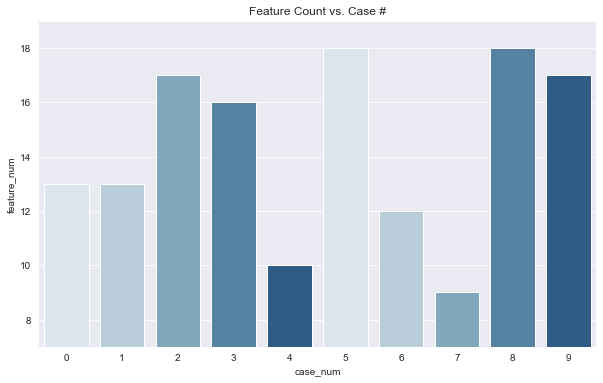

In [75]:
case_by_featnum = feat.groupby("case_num").feature_num.count()

# Set style
sns.set_style("darkgrid")
# Set size
plt.figure(figsize=(10,6))
# Add Title
plt.title("Feature Count vs. Case #")
# Bar Chart
sns.barplot(x=case_by_featnum.index, y=case_by_featnum, palette=sns.color_palette('Blues', n_colors=5, desat=.75))
# Change Y limit
plt.ylim(7, 19)

# Creating Plot for "Distribution of Patient per Case #"

<AxesSubplot:title={'center':'Patient Note Count vs. Case #'}, xlabel='case_num'>

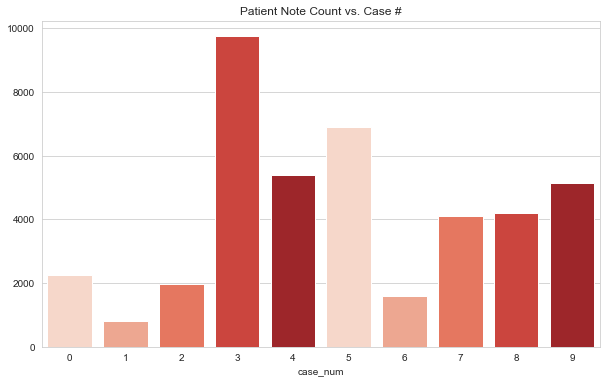

In [74]:
case_by_pnum = pNotes.groupby("case_num").size()

# Set style
sns.set_style("whitegrid")
# Set size
plt.figure(figsize=(10,6))
# Add Title
plt.title("Patient Note Count vs. Case #")
# Bar Chart
sns.barplot(x=case_by_pnum.index, y=case_by_pnum, palette=sns.color_palette('Reds', n_colors=5))

# Wordcloud per Case Numbers

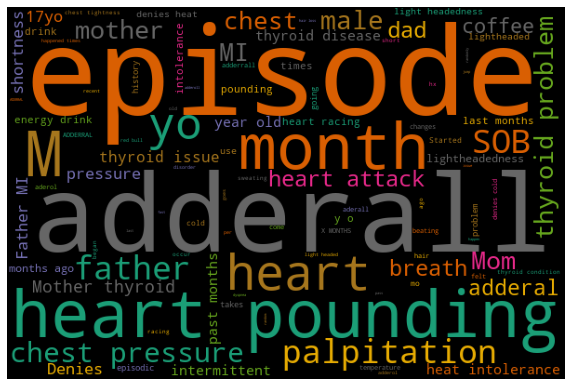

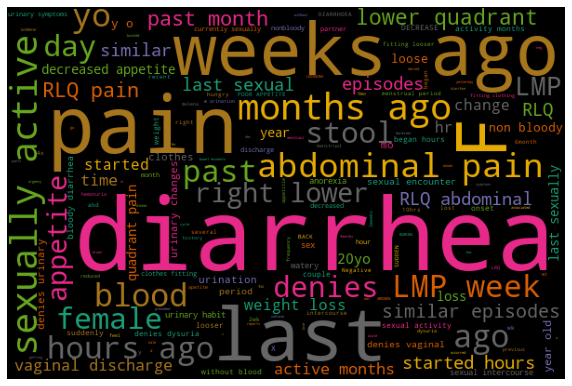

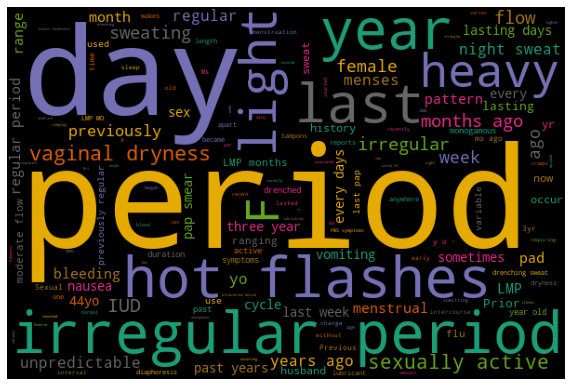

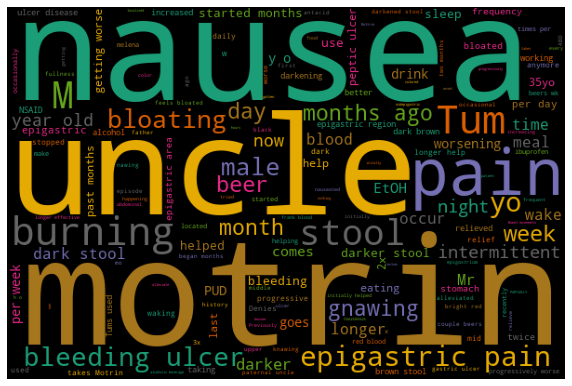

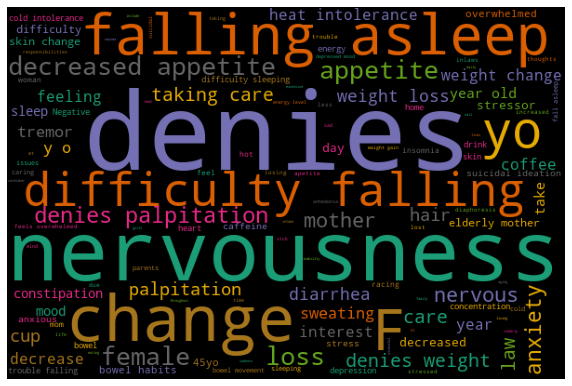

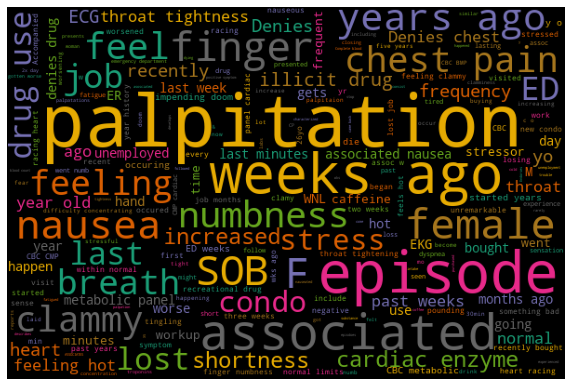

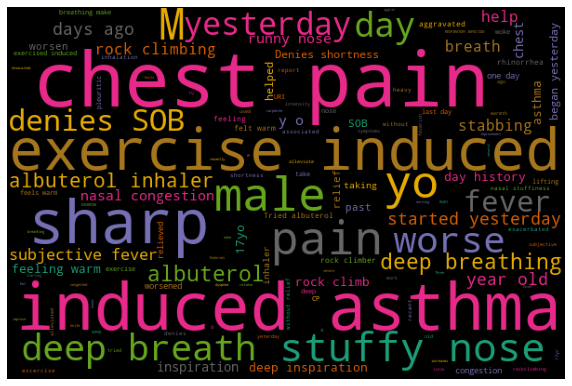

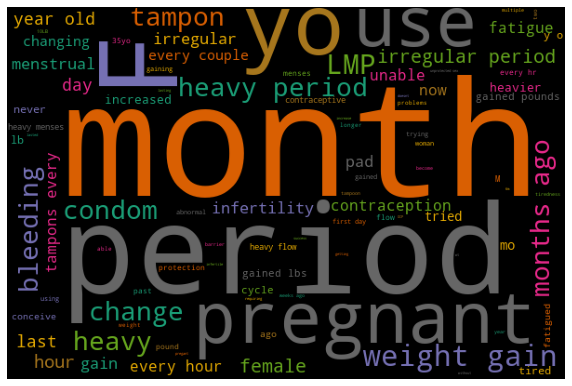

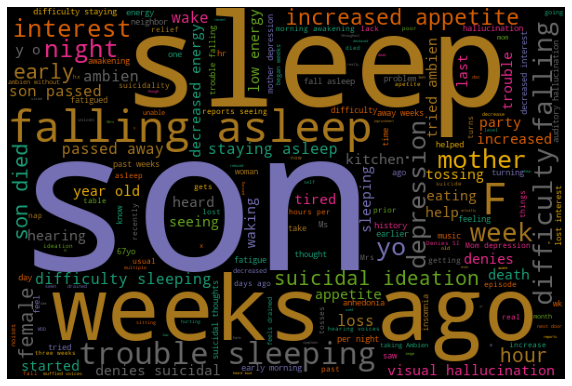

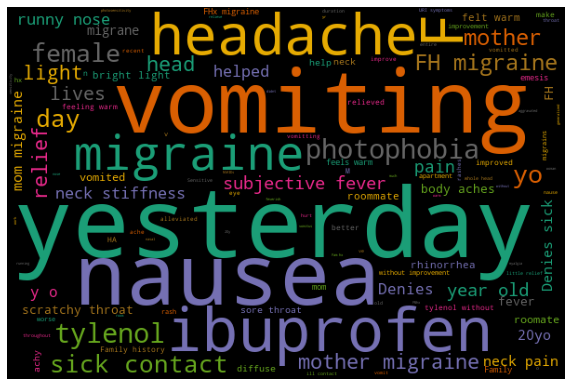

In [65]:
def generate_wordcloud(annot):
    wc = WordCloud(stopwords=STOPWORDS, max_words = 300, width=600, height=400, colormap="Dark2").generate(annot)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(wc, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wc)

# case1 = training[(training.case_num == 1) & (training.annotation != "[]")]
# annot_total_list = case1.annotation.map(literal_eval).sum()
# # random.shuffle(annot_total_list)
# annot_total_list
# annot_total.head(15)
for i in range(10):
    case_i = training[(training.case_num == i) & (training.annotation != "[]")]
    annot_i_total = case_i.annotation.map(literal_eval).sum()
    random.shuffle(annot_i_total) # so that matching occurances don't get lumped together
    annot_i_total = " ".join(annot_i_total)
    generate_wordcloud(annot_i_total)


# Overall Goal

### Domain problem is span prediction, specifically multi-span predicition

### Current goal is to query patient notes with a case # and feature # in mind and return locations of closest matches

### Name Entity Recognition could be a subproblem, not sure

https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/306717

# Interesting Observations


* 1000 unique patients
* Total of 12234 annotations in training data, 2 rows has 7 and 8 annotations respectively, 4399 rows have missing
    - Possible to annotate ourselves using multiple different methods
        - Exact matches, see more: https://www.kaggle.com/wuyhbb/get-more-training-data-with-exact-match
        - Similar matches, similarity score and threshold used to annotate
* Feature text has OR a lot and many entries have similar phrases.
    * 000 and 001, family could include Father, Mother, Aunt, Brother, Sister, etc.
    * 101, weight-loss could be "clothes are looser", "can't fit in pants", etc.
* Patient notes have a lot of synonyms and similar phrases to features, must think about how we'll capture.
* Quotes in patient notes could be useless, will hold off on scrapping them though
* In patient notes there are a ton of abbreviations, some links below cover them:
    * https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/304607
    * https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/307905
    * https://www.kaggle.com/abdelrhmanhosny/eda-abbreviations-word-counts
    * https://static1.squarespace.com/static/5899cafd03596edea584afca/t/5aa7db4fc83025af3fd36716/1520950096544/Common+abbreviations+for+the+patient+note+USMLE+step+2CS.pdf

# Things to Remember for Later

* After preprocessing, location of words will be all messed up.
    - Problem: https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/304645, *need to scroll down to the comments to find this*
    - Solution? https://www.kaggle.com/samarthagarwal23/understanding-data-creation-multi-span
* Possible Validation Strategies below, no idea what they mean
    - https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/305599
* Bert Models seem to be the goto, but the different models have their own tradeoffs
    - DistilBert - According to some post it was smaller yet performed about the same as BERT
    - BioBERT - Specific to biomedical but maybe not much corpus(training data) related, https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/305793
* Evaluation method is F1-Scoring, should read later
    - https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/306997
* No internet allowed during the kaggle submission, but there are ways to circumvent
    - https://www.kaggle.com/c/nbme-score-clinical-patient-notes/discussion/305305